In [ ]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Input, AveragePooling2D, Concatenate
from keras.utils import np_utils
from keras.datasets import mnist, cifar10, fashion_mnist
import skimage.transform
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# GoogLeNet and VGG16 Model Build

In [ ]:
class GoogleNet:

    def __init__(self, input_shape, nlabels):
        self._input_shape = input_shape
        self._nlabels = nlabels
        self._model = self.initialize_model()

    def model(self):
        return self._model

    def _inception(self, in_, filters):
        #
        i1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(in_)

        i2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(in_)
        i2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')i2)

        i3 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(in_)
        i3 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(i3)

        i4 = MaxPooling2D(pool_size=(1,1), strides=1, padding='same')(in_)
        i3 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(i4)
        return Concatenate(axis=-1)([i1, i2, i3, i4])

    def _output(self, in_, name=None):
        outt = AveragePooling2D(pool_size=(1,1), strides=1, padding='valid')(in_)
        outt = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(outt)
        outt = Flatten()(outt)
        outt = Dense(units=256, activation='relu')(outt)
        outt = Dropout(0.5)(outt)
        outt = Dense(units=self._nlabels, activation='softmax', name=name)(outt)
        return outt

    def initialize_model(self):
        input_ = Input(shape=self._input_shape)

        ## Conv2D(filters, kernel_size, strides, padding, activation)
        seq = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(input_)
        seq = MaxPooling2D(pool_size=(1,1), strides=2, padding='same')(seq)
        seq = BatchNormalization()(seq)

        ## Conv2D(filters, kernel_size, strides, padding, activation)
        seq = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(seq)
        seq = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(seq)
        seq = BatchNormalization()(seq)
        seq = MaxPooling2D(pool_size=(1,1), strides=2, padding='same')(seq)

        ## Conv2D(filters, kernel_size, strides, padding, activation)
        seq = self._inception(seq, [ 64,  (96,128), (16,32), 32])
        seq = self._inception(seq, [128, (128,192), (32,96), 64]) 
        seq = MaxPooling2D(pool_size=(1,1), strides=2, padding='same')(seq)

        ## Conv2D(filters, kernel_size, strides, padding, activation)
        seq = self._inception(seq, [ 192,  (96,208), (16,48), 64])
        out1 = self._output(seq, name='out1')
        seq = self._inception(seq, [ 160,  (112,224), (24,64), 64])
        seq = self._inception(seq, [ 128,  (128,256), (24,64), 64])
        seq = self._inception(seq, [ 112,  (144,288), (32,64), 64])
        out2 = self._output(seq, name='out2')
        seq = self._inception(seq, [ 256,  (160,320), (32,128), 128])
        seq = MaxPooling2D(pool_size=(1,1), strides=2, padding='same')(seq)

        ## Conv2D(filters, kernel_size, strides, padding, activation)
        seq = self._inception(seq, [ 256,  (160,320), (32,128), 128])
        seq = self._inception(seq, [ 384,  (192,384), (48,128), 128])
        seq = AveragePooling2D(pool_size=(1,1), strides=1, padding='valid')(seq)

        ## Conv2D(filters, kernel_size, strides, padding, activation)
        seq = Flatten()(seq)
        seq = Dropout(0.5)(seq)
        seq = Dense(units=256, activation='linear')(seq)
        seq = Dense(units=self._nlabels, activation='softmax', name='out')(seq)

        output_ = seq

        model = Model(input_, [output_, out1, out2])


        model.compile(
                loss = keras.losses.categorical_crossentropy,
                optimizer=optimizerr,
                metrics=['accuracy'],)
        return model



class VGG16:
    def __init__(self, input_shape, nlabels):
        self._input_shape = input_shape
        self._nlabels = nlabels
        self._model = self.initialize_model()

    def model(self):
        return self._model

    def initialize_model(self):
        print(self._input_shape)
        input_ = Input(shape=self._input_shape)
        
        #### Conv2D(filters, kernel_size, padding, activation)
        seq = Conv2D(64, (3,3), padding="same", activation="relu", name="b1_conv1")(input_)
        seq = Conv2D(64, (3,3), padding="same", activation="relu", name="b1_conv2")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b1_pool")(seq)

        ### Conv2D(filters, kernel_size, padding, activation)
        seq = Conv2D(128, (3,3), padding="same", activation="relu", name="b2_conv1")(seq)
        seq = Conv2D(128, (3,3), padding="same", activation="relu", name="b2_conv2")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b2_pool")(seq)

        ### Conv2D(filters, kernel_size, padding, activation)
        seq = Conv2D(256, (3,3), padding="same", activation="relu", name="b3_conv1")(seq)
        seq = Conv2D(256, (3,3), padding="same", activation="relu", name="b3_conv2")(seq)
        seq = Conv2D(256, (3,3), padding="same", activation="relu", name="b3_conv3")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b3_pool")(seq)

        ### Conv2D(filters, kernel_size, padding, activation)
        seq = Conv2D(512, (3,3), padding="same", activation="relu", name="b4_conv1")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu", name="b4_conv2")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu", name="b4_conv3")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b4_pool")(seq)

        ### Conv2D(filters, kernel_size, padding, activation) 
        seq = Conv2D(512, (3,3), padding="same", activation="relu", name="b5_conv1")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu", name="b5_conv2")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu", name="b5_conv3")(seq)

        seq = MaxPooling2D((1,1), strides=(2, 2), name="b5_pool")(seq)

        seq = Flatten(name="flatten")(seq)
        seq = Dense(units=4096, activation="relu", name="dense1")(seq)
        seq = Dense(units=4096, activation="relu", name="dense2")(seq)
        seq = Dense(units=self._nlabels, activation="softmax", name="softmax")(seq)

        output_ = seq

        model = Model(input_, output_)

        model.compile(
                loss = keras.losses.categorical_crossentropy,
                optimizer=optimizerr,
                metrics=['accuracy'],)
        return model

        

# GoogLeNet Fashion-MNIST

In [ ]:

def googlenet_mnist(): # fashion MNIST
    nlabels = 10
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    y_train = keras.utils.np_utils.to_categorical(y_train, nlabels)
    y_test = keras.utils.np_utils.to_categorical(y_test, nlabels)

    x_train= x_train/ 255.
    x_test= x_test/ 255.
    x_train= x_train.astype('float32')
    x_test= x_test.astype('float32')

    # reshape to 3 dims
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    input_shape = x_train.shape

    # initialize the model
    googlenet = GoogleNet(input_shape[1:], nlabels)

    googlenet.model().summary()

    hist = googlenet.model().fit(x_train, [y_train, y_train, y_train], batch_size=BATCH_SIZE, epochs=20, validation_split=0.2)
    # hist = googlenet.model().fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=0.2)
    res_eval = googlenet.model().evaluate(x_test, [y_test, y_test, y_test], batch_size=100) 
    # res_eval = googlenet.model().evaluate(x_test, y_test, batch_size=100)
    
    return (googlenet, hist.history, res_eval)


# GoogleNet CIFAR10


In [ ]:
def googlenet_cifar10():
    nlabels = 10
    # load dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    y_train = keras.utils.np_utils.to_categorical(y_train, nlabels)
    y_test = keras.utils.np_utils.to_categorical(y_test, nlabels)

    x_train= x_train/ 255.
    x_test= x_test/ 255.
    x_train= x_train.astype('float32')
    x_test= x_test.astype('float32')

    input_shape = x_train.shape

    # initialize the model
    googlenet = GoogleNet(input_shape[1:], nlabels)
    googlenet.model().summary()

    hist = googlenet.model().fit(x_train, [y_train, y_train, y_train], batch_size=BATCH_SIZE, epochs=20, validation_split=0.2) 
    # hist = googlenet.model().fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=0.2)
    res_eval = googlenet.model().evaluate(x_test, [y_test, y_test, y_test], batch_size=100) 
    # res_eval = googlenet.model().evaluate(x_test, y_test, batch_size=100)

    return (googlenet, hist.history, res_eval)


# VGG16 CIFAR10

In [ ]:
def vgg16_cifar10():
    nlabels = 10
    # load dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()


    y_train = keras.utils.np_utils.to_categorical(y_train, nlabels)
    y_test = keras.utils.np_utils.to_categorical(y_test, nlabels)

    x_train= x_train/ 255.
    x_test= x_test/ 255.
    x_train= x_train.astype('float32')
    x_test= x_test.astype('float32')

    input_shape = x_train.shape

    # initialize the model
    vgg = VGG16(input_shape[1:], nlabels)
    
    vgg.model().summary()

    hist = vgg.model().fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=0.2)
    res_eval = vgg.model().evaluate(x_test, y_test, batch_size=100)
    
    return (vgg, hist.history, res_eval)

# VGG16 Fashion-MNIST

In [ ]:
def vgg16_mnist(): # Fashion MNIST
    nlabels = 10
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    y_train = keras.utils.np_utils.to_categorical(y_train, nlabels)
    y_test = keras.utils.np_utils.to_categorical(y_test, nlabels)

    x_train= x_train / 255.
    x_test= x_test / 255.
    x_train= x_train.astype('float32')
    x_test= x_test.astype('float32')

    # reshape to 3 dims
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    input_shape = x_train.shape

    # initialize the model
    vgg = VGG16(input_shape[1:], nlabels)

    vgg.model().summary()
    print("BATCH_SIZE",BATCH_SIZE)
    hist = vgg.model().fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=0.2)
    res_eval = vgg.model().evaluate(x_test, y_test, batch_size=100)
    
    return (vgg, hist.history, res_eval)


# Plotting

In [ ]:
import matplotlib.pyplot as plt


def plot_train(history):
    acc = history['out_accuracy']
    val_acc = history['val_out_accuracy']
    loss = history['out_loss']
    val_loss = history['val_out_loss']
    total_epochs = range(20)

    plt.figure(figsize=(9, 9))
    plt.subplot(1, 2, 1)
    plt.plot(total_epochs, acc, label='Training Accuracy')
    plt.plot(total_epochs, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(total_epochs, loss, label='Training Loss')
    plt.plot(total_epochs, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def plot_train_vgg(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    total_epochs = range(20)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(total_epochs, acc, label='Training Accuracy')
    plt.plot(total_epochs, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(total_epochs, loss, label='Training Loss')
    plt.plot(total_epochs, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


def print_evaluate_vgg(eval_value):
    print('eval loss : {}'.format(eval_value[0]))
    print('eval accuracy : {}'.format(eval_value[1]))


def print_evaluate(eval_value):
    print('eval loss : {}'.format(eval_value[1]))
    print('eval accuracy : {}'.format(eval_value[4]))


# Test / Evaluation


# Learning Rate 0.0001

### GoogleNet - Fashion - MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gm = googlenet_mnist()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 64)   3200        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 7, 7, 64)     0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 7, 7, 64)    256         ['max_pooling2d[0][0]']          
 alization)                                                                                 

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gc = googlenet_cifar10()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_59 (Conv2D)             (None, 16, 16, 64)   9472        ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 8, 8, 64)    0           ['conv2d_59[0][0]']              
 )                                                                                                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 8, 8, 64)    256         ['max_pooling2d_13[0][0]'] 

### VGG16 - FAshion MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vm = vgg16_mnist()

(28, 28, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 b1_conv2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 7, 7, 128)   

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vc = vgg16_cifar10()

(32, 32, 3)
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 b1_conv2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 8, 8, 128)

### PLOTS

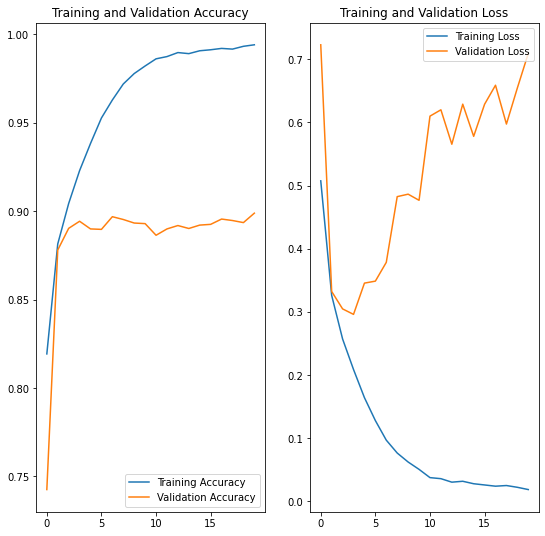

eval loss : 0.7616697549819946
eval accuracy : 0.894599974155426


In [ ]:
plot_train(gm[1])
print_evaluate(gm[2])

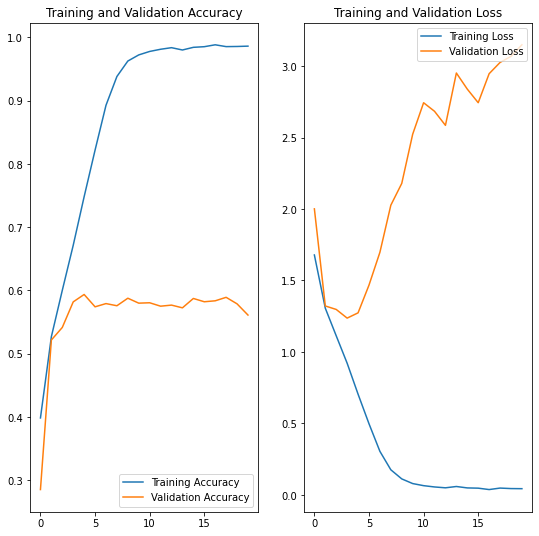

eval loss : 3.124126434326172
eval accuracy : 0.5640000104904175


In [ ]:
plot_train(gc[1])
print_evaluate(gc[2])

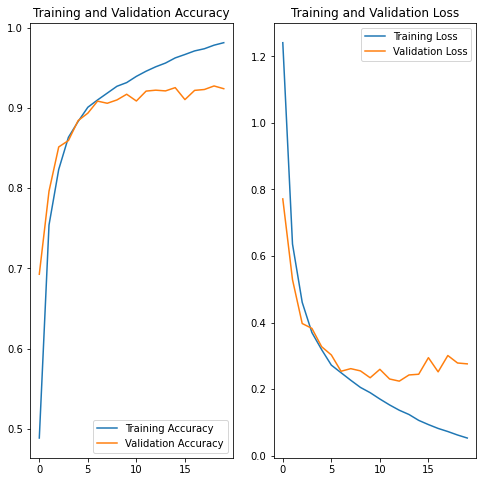

eval loss : 0.3036523759365082
eval accuracy : 0.9214000105857849


In [ ]:
plot_train_vgg(vm[1])
print_evaluate_vgg(vm[2])

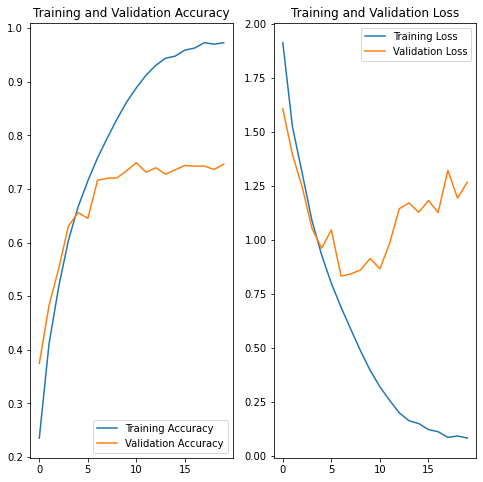

eval loss : 1.294264316558838
eval accuracy : 0.7444000244140625


In [ ]:
plot_train_vgg(vc[1])
print_evaluate_vgg(vc[2])

# Learning Rate 0.01

### GoogleNet - Fashion - MNIST and CIFAR10

In [ ]:
# learning_rate = 0.0001
learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gm = googlenet_mnist()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_118 (Conv2D)            (None, 14, 14, 64)   3200        ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 7, 7, 64)    0           ['conv2d_118[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 7, 7, 64)    256         ['max_pooling2d_26[0][0]'] 

In [ ]:
# learning_rate = 0.0001
learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gc = googlenet_cifar10()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_177 (Conv2D)            (None, 16, 16, 64)   9472        ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_39 (MaxPooling2D  (None, 8, 8, 64)    0           ['conv2d_177[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 8, 8, 64)    256         ['max_pooling2d_39[0][0]'] 

### VGG16 - FAshion MNIST and CIFAR10

In [ ]:
# learning_rate = 0.0001
learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vm = vgg16_mnist()

(28, 28, 1)
Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 b1_conv2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 7, 7, 128)

In [ ]:
# learning_rate = 0.0001
learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vc = vgg16_cifar10()

(32, 32, 3)
Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 b1_conv2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 8, 8, 128)

### PLOTS

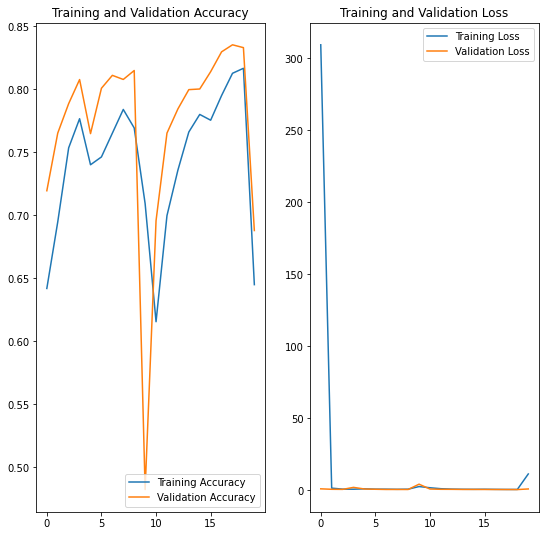

eval loss : 0.941027820110321
eval accuracy : 0.6814000010490417


In [ ]:
plot_train(gm[1])
print_evaluate(gm[2])

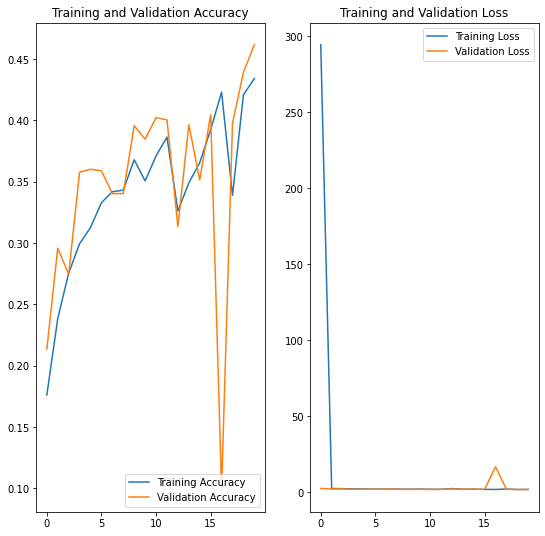

eval loss : 1.5011714696884155
eval accuracy : 0.46720001101493835


In [ ]:
plot_train(gc[1])
print_evaluate(gc[2])

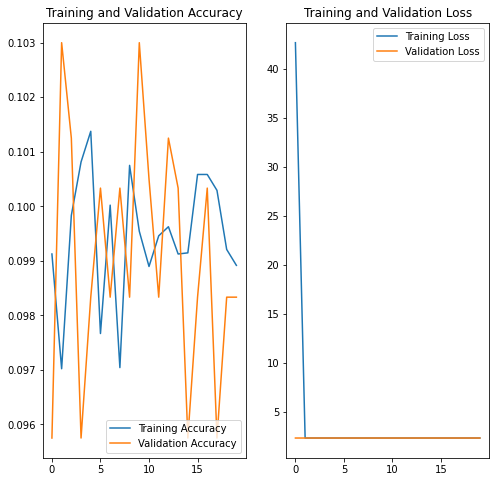

eval loss : 2.302994728088379
eval accuracy : 0.10000000149011612


In [ ]:
plot_train_vgg(vm[1])
print_evaluate_vgg(vm[2])

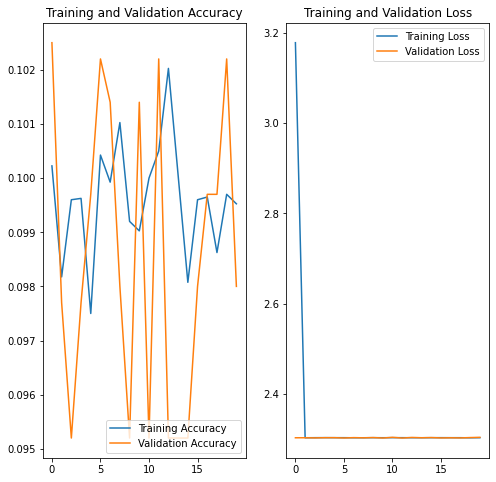

eval loss : 2.3036959171295166
eval accuracy : 0.10000000149011612


In [ ]:
plot_train_vgg(vc[1])
print_evaluate_vgg(vc[2])

# Learning Rate 0.1

### GoogleNet - Fashion - MNIST and CIFAR10

In [ ]:
# learning_rate = 0.0001
# learning_rate = 0.01
learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gm = googlenet_mnist()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_236 (Conv2D)            (None, 14, 14, 64)   3200        ['input_12[0][0]']               
                                                                                                  
 max_pooling2d_52 (MaxPooling2D  (None, 7, 7, 64)    0           ['conv2d_236[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 7, 7, 64)    256         ['max_pooling2d_52[0][0]']

In [ ]:
# learning_rate = 0.0001
# learning_rate = 0.01
learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gc = googlenet_cifar10()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_295 (Conv2D)            (None, 16, 16, 64)   9472        ['input_13[0][0]']               
                                                                                                  
 max_pooling2d_65 (MaxPooling2D  (None, 8, 8, 64)    0           ['conv2d_295[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_10 (BatchN  (None, 8, 8, 64)    256         ['max_pooling2d_65[0][0]']

### VGG16 - FAshion MNIST and CIFAR10

In [ ]:
# learning_rate = 0.0001
# learning_rate = 0.01
learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vm = vgg16_mnist()

(28, 28, 1)
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 b1_conv2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 7, 7, 128)

In [ ]:
# learning_rate = 0.0001
# learning_rate = 0.01
learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vc = vgg16_cifar10()

(32, 32, 3)
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 b1_conv2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 8, 8, 128)

### PLOTS

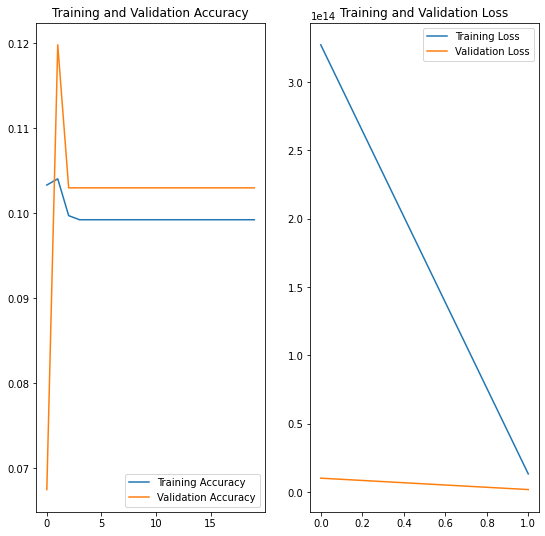

eval loss : nan
eval accuracy : 0.10000000149011612


In [ ]:
plot_train(gm[1])
print_evaluate(gm[2])

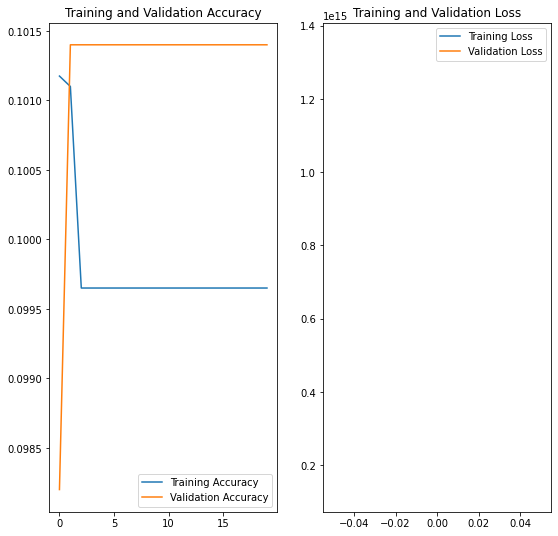

eval loss : nan
eval accuracy : 0.10000000149011612


In [ ]:
plot_train(gc[1])
print_evaluate(gc[2])

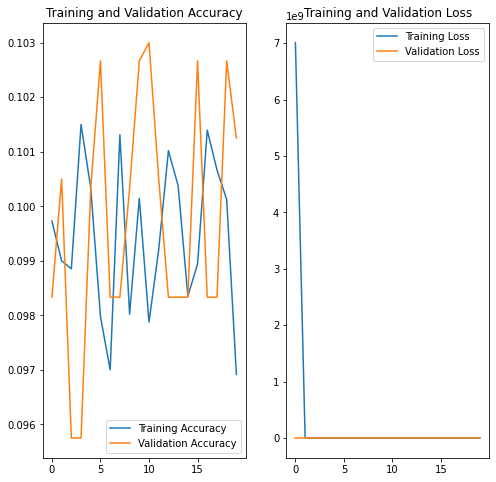

eval loss : 2.3121674060821533
eval accuracy : 0.10000000149011612


In [ ]:
plot_train_vgg(vm[1])
print_evaluate_vgg(vm[2])

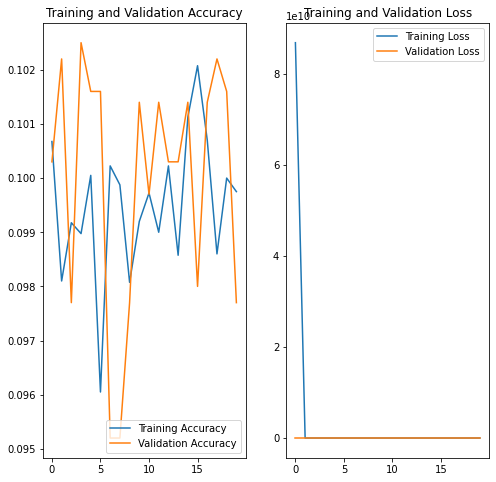

eval loss : 2.3142783641815186
eval accuracy : 0.10000000149011612


In [ ]:
plot_train_vgg(vc[1])
print_evaluate_vgg(vc[2])

# Batch 500

### GoogleNet - Fashion - MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 500
gm = googlenet_mnist()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_354 (Conv2D)            (None, 14, 14, 64)   3200        ['input_16[0][0]']               
                                                                                                  
 max_pooling2d_78 (MaxPooling2D  (None, 7, 7, 64)    0           ['conv2d_354[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_12 (BatchN  (None, 7, 7, 64)    256         ['max_pooling2d_78[0][0]']

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 500
gc = googlenet_cifar10()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_413 (Conv2D)            (None, 16, 16, 64)   9472        ['input_17[0][0]']               
                                                                                                  
 max_pooling2d_91 (MaxPooling2D  (None, 8, 8, 64)    0           ['conv2d_413[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_14 (BatchN  (None, 8, 8, 64)    256         ['max_pooling2d_91[0][0]']

### VGG16 - FAshion MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 500
vm = vgg16_mnist()

(28, 28, 1)
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 b1_conv2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 7, 7, 128)

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 500
vc = vgg16_cifar10()

(32, 32, 3)
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 b1_conv2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 8, 8, 128)

### PLOTS

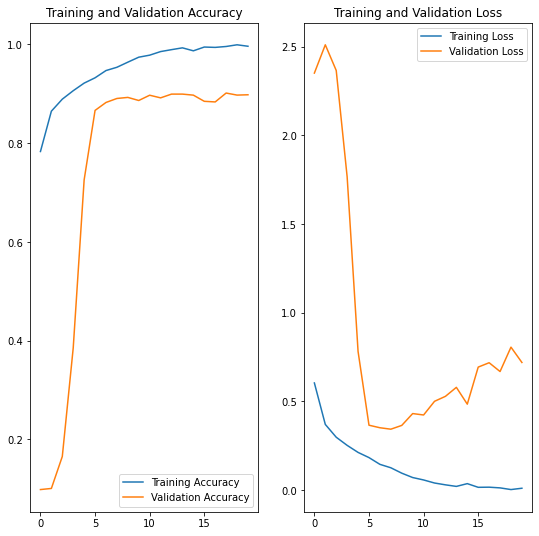

eval loss : 0.7727634906768799
eval accuracy : 0.8959000110626221


In [ ]:
plot_train(gm[1])
print_evaluate(gm[2])

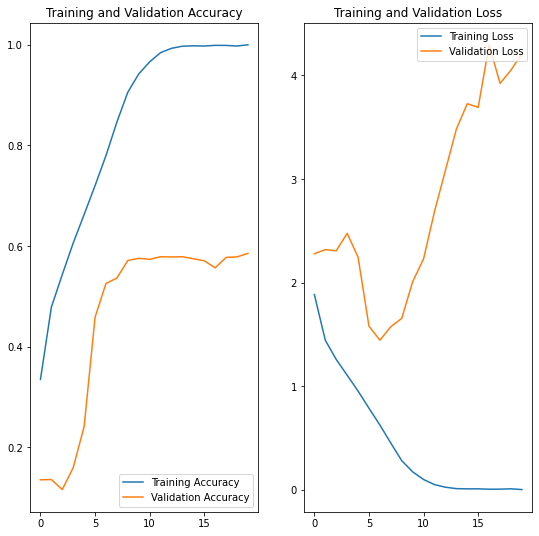

eval loss : 4.246243953704834
eval accuracy : 0.5934000015258789


In [ ]:
plot_train(gc[1])
print_evaluate(gc[2])

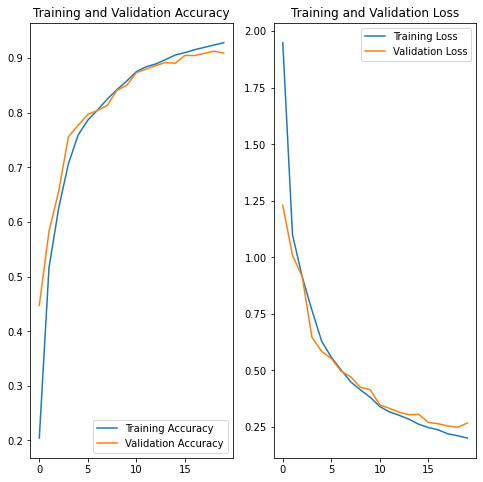

eval loss : 0.28537043929100037
eval accuracy : 0.9046000242233276


In [ ]:
plot_train_vgg(vm[1])
print_evaluate_vgg(vm[2])

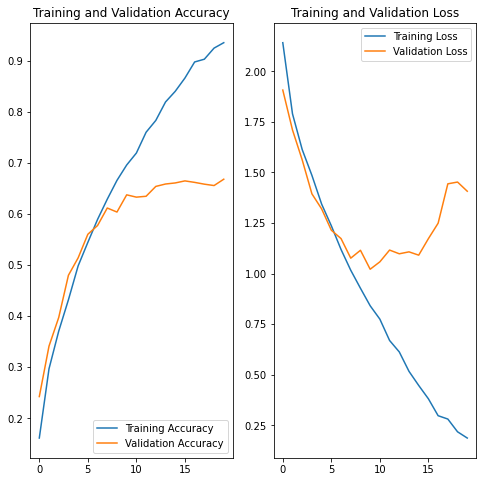

eval loss : 1.4718258380889893
eval accuracy : 0.6640999913215637


In [ ]:
plot_train_vgg(vc[1])
print_evaluate_vgg(vc[2])

# Batch 1000

### GoogleNet - Fashion - MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 1000
gm = googlenet_mnist()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_472 (Conv2D)            (None, 14, 14, 64)   3200        ['input_20[0][0]']               
                                                                                                  
 max_pooling2d_104 (MaxPooling2  (None, 7, 7, 64)    0           ['conv2d_472[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_16 (BatchN  (None, 7, 7, 64)    256         ['max_pooling2d_104[0][0]'

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 1000
gc = googlenet_cifar10()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_531 (Conv2D)            (None, 16, 16, 64)   9472        ['input_21[0][0]']               
                                                                                                  
 max_pooling2d_117 (MaxPooling2  (None, 8, 8, 64)    0           ['conv2d_531[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_18 (BatchN  (None, 8, 8, 64)    256         ['max_pooling2d_117[0][0]'

### VGG16 - FAshion MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 1000
vm = vgg16_mnist()

(28, 28, 1)
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 b1_conv2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 7, 7, 128)

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
optimizerr = Adam(learning_rate=learning_rate)
# optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 1000
vc = vgg16_cifar10()

(32, 32, 3)
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 b1_conv2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 8, 8, 128)

### PLOTS

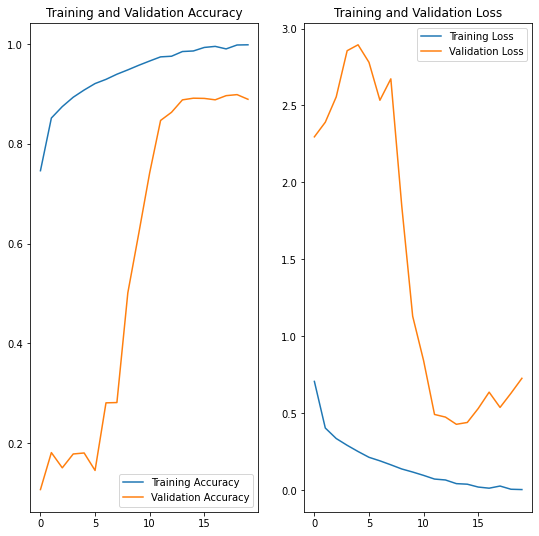

eval loss : 0.7842894792556763
eval accuracy : 0.8920000195503235


In [ ]:
plot_train(gm[1])
print_evaluate(gm[2])

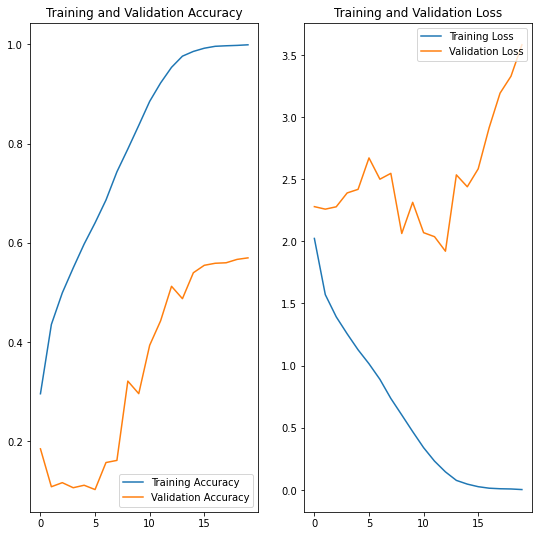

eval loss : 3.5553038120269775
eval accuracy : 0.5748000144958496


In [ ]:
plot_train(gc[1])
print_evaluate(gc[2])

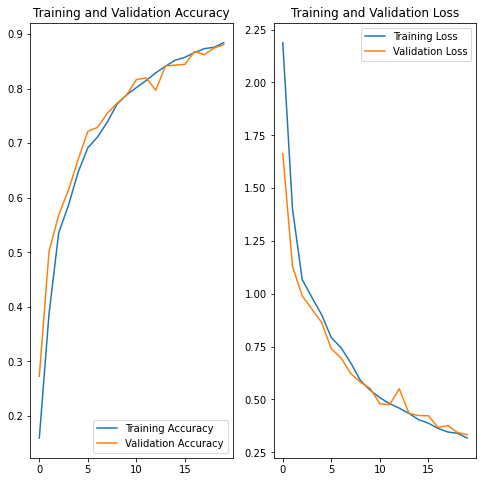

eval loss : 0.3547031581401825
eval accuracy : 0.8727999925613403


In [ ]:
plot_train_vgg(vm[1])
print_evaluate_vgg(vm[2])

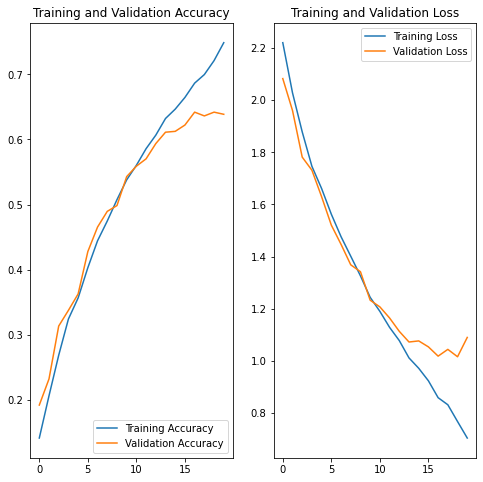

eval loss : 1.0915844440460205
eval accuracy : 0.6304000020027161


In [ ]:
plot_train_vgg(vc[1])
print_evaluate_vgg(vc[2])

# Optimization SVG (Previous one was Adam)

### GoogleNet - Fashion - MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
# optimizerr = Adam(learning_rate=learning_rate)
optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gm = googlenet_mnist()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_590 (Conv2D)            (None, 14, 14, 64)   3200        ['input_24[0][0]']               
                                                                                                  
 max_pooling2d_130 (MaxPooling2  (None, 7, 7, 64)    0           ['conv2d_590[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 64)    256         ['max_pooling2d_130[0][0]'

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
# optimizerr = Adam(learning_rate=learning_rate)
optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
gc = googlenet_cifar10()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_649 (Conv2D)            (None, 16, 16, 64)   9472        ['input_25[0][0]']               
                                                                                                  
 max_pooling2d_143 (MaxPooling2  (None, 8, 8, 64)    0           ['conv2d_649[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_22 (BatchN  (None, 8, 8, 64)    256         ['max_pooling2d_143[0][0]'

### VGG16 - FAshion MNIST and CIFAR10

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
# optimizerr = Adam(learning_rate=learning_rate)
optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vm = vgg16_mnist()

(28, 28, 1)
Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 b1_conv2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 7, 7, 128)

In [ ]:
learning_rate = 0.0001
# learning_rate = 0.01
# learning_rate = 0.1
# optimizerr = Adam(learning_rate=learning_rate)
optimizerr = tf.keras.optimizers.SGD(learning_rate=learning_rate)

BATCH_SIZE = 100
vc = vgg16_cifar10()

(32, 32, 3)
Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 b1_conv1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 b1_conv2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 b1_pool (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 b2_conv1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 b2_conv2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 b2_pool (MaxPooling2D)      (None, 8, 8, 128)

### PLOTS

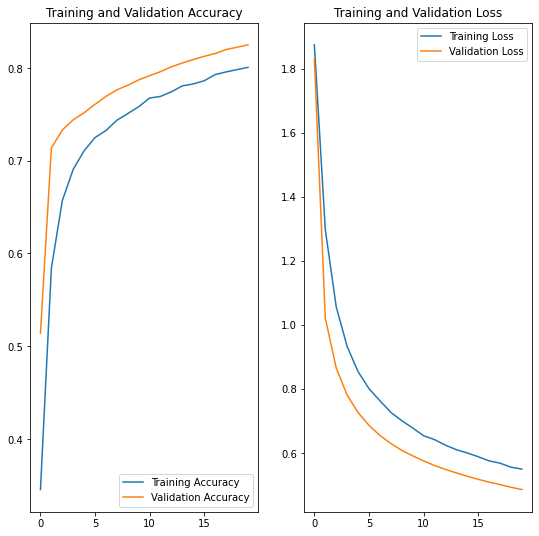

eval loss : 0.5133512616157532
eval accuracy : 0.8141000270843506


In [ ]:
plot_train(gm[1])
print_evaluate(gm[2])

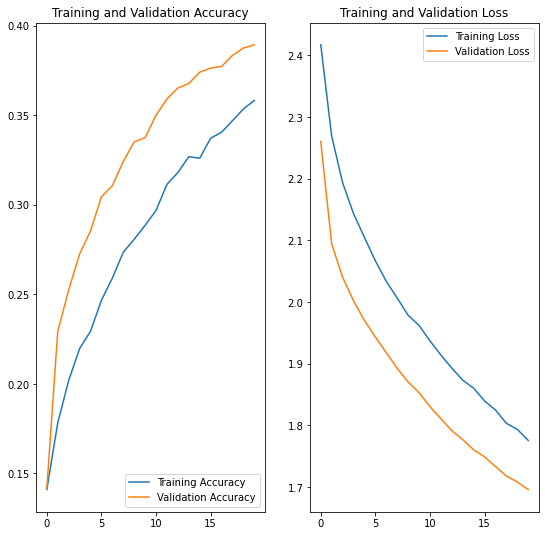

eval loss : 1.669981837272644
eval accuracy : 0.40689998865127563


In [ ]:
plot_train(gc[1])
print_evaluate(gc[2])

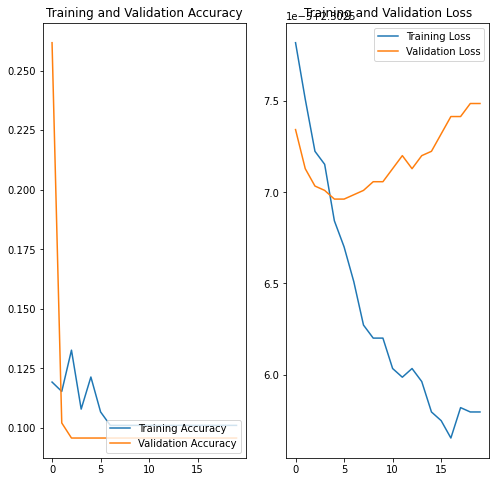

eval loss : 2.3025591373443604
eval accuracy : 0.10000000149011612


In [ ]:
plot_train_vgg(vm[1])
print_evaluate_vgg(vm[2])

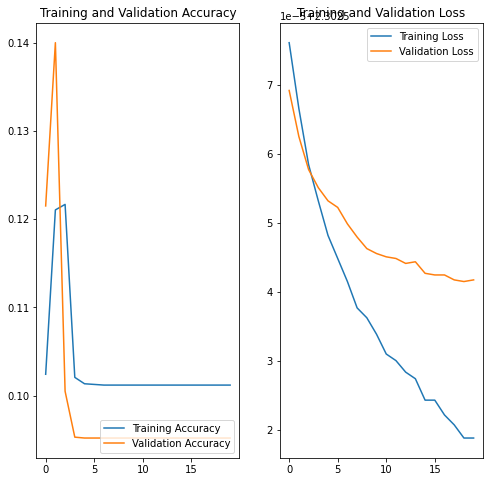

eval loss : 2.302520990371704
eval accuracy : 0.10000000149011612


In [ ]:
plot_train_vgg(vc[1])
print_evaluate_vgg(vc[2])

# Done
# Thank You
